## Import libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import datetime
import seaborn as sn
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller
from scipy.fftpack import fft, fftfreq
from statsmodels.tsa.arima.model import ARIMA


## Customize

In [24]:
#customize your application 

#name of the file where you have historical data
myfile='0203 Revenue_month.csv'

#Name the jpg file where you want to save the decomposition plot 
my_decomp_plot='0203 decomp_plot.jpg'

#Name the jpg file where you want to save the trend plot 
my_trend_plot='0203 trend_plot.jpg'

#Name the jpg file where you want to save the seasonality plot  
my_season_plot='0203 season_plot.jpg'

#Name the jpg file where you want to save the cyclality plot 
my_cycle_plot='0203 cycle_plot.jpg'

#Name the jpg file where you want to save the residual plot 
my_residue_plot='0203 residue_plot.jpg'

#Name the jpg file where you want to save the ACF and PACF plot 
my_corr_plot='0203 corr_plot.jpg'


## Load data and preprocess

In [26]:
#myfile='Revenue_month.csv'
df = pd.read_csv(myfile)

#If we want to use some limited numebr of days
#df=df.tail(200)

# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%y')

# Set the Date column as the index
df.set_index('Date', inplace=True)


 ## Time Series decomposition

<Figure size 640x480 with 0 Axes>

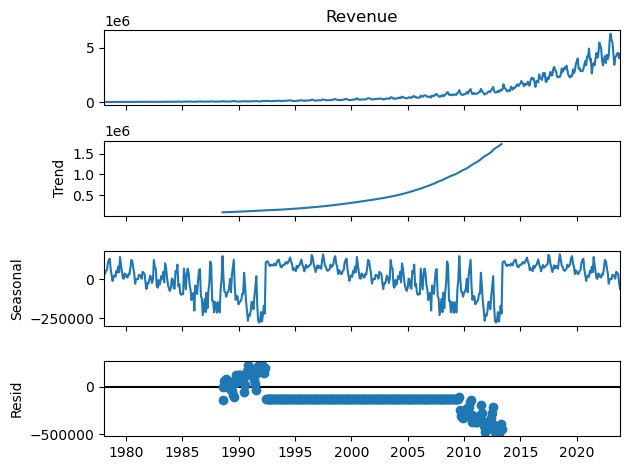

In [28]:
# Decomposing to find seasonality 

# Focusing on the Revenue
base_values = df['Revenue']

# Decomposing to find seasonality with a yearly periodicity (Annual working days))
result = seasonal_decompose(base_values, model='additive', period=252)

# Save the plot
plt.savefig(my_decomp_plot, format='jpg')

# Plotting the decomposed components
result.plot()
plt.show()


## Understand trend

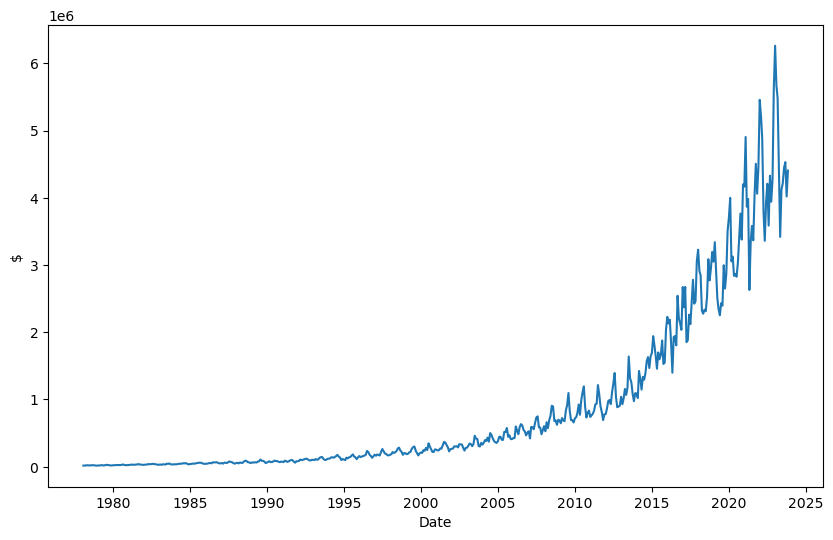

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(df.Revenue)
plt.ylabel('$')
plt.xlabel('Date')

# Save the plot
plt.savefig(my_trend_plot, format='jpg')

# Display plot
plt.show()

## Understand seasonality

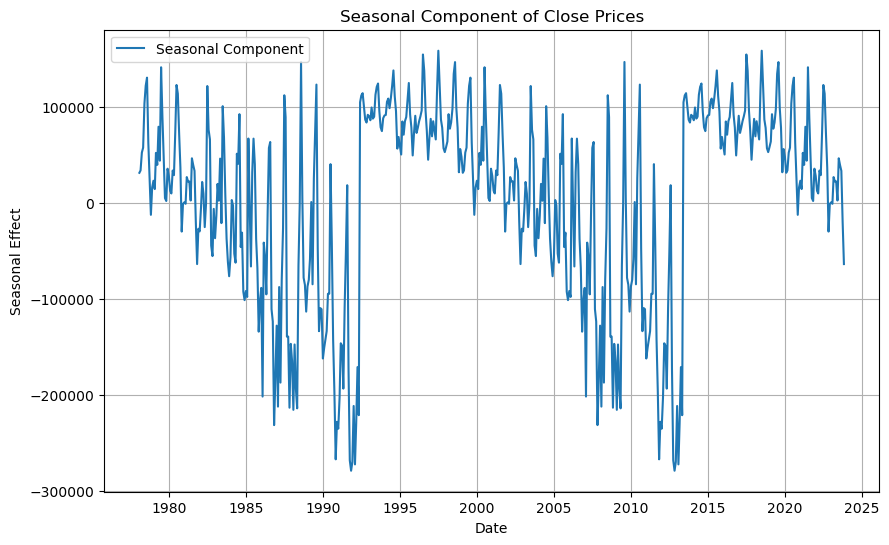

In [32]:
# Plotting the seasonality component separately
plt.figure(figsize=(10, 6))
plt.plot(result.seasonal, label='Seasonal Component')
plt.title('Seasonal Component of Close Prices')
plt.xlabel('Date')
plt.ylabel('Seasonal Effect')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig(my_season_plot, format='jpg')

# Display plot
plt.show()

## Understand Cyclicality

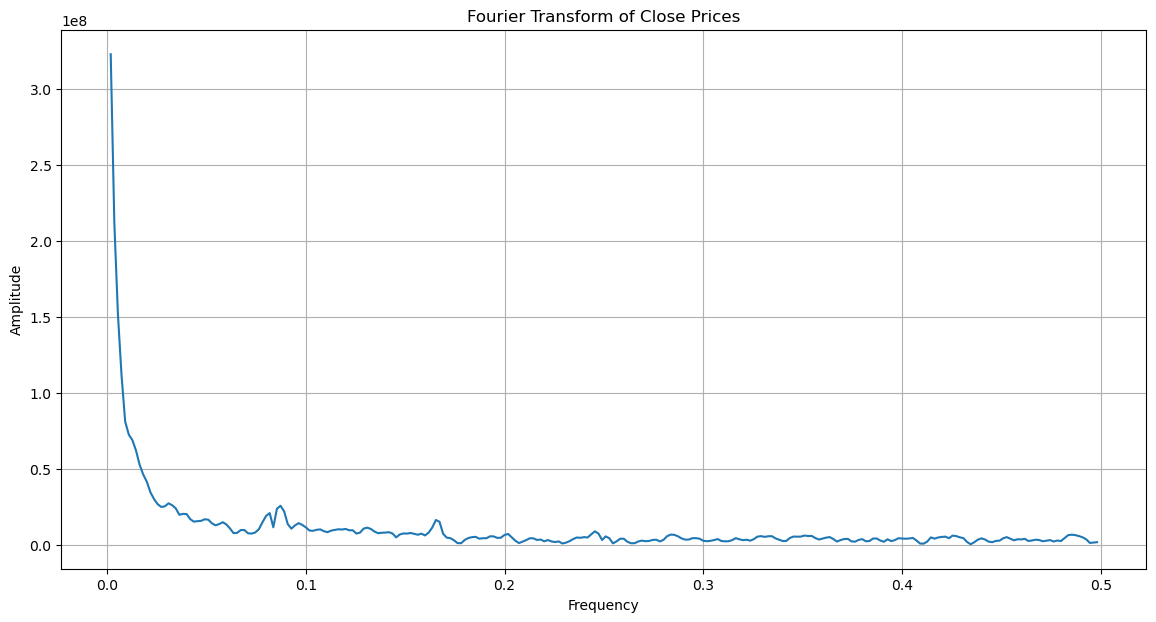

In [34]:

# Optionally parse dates and set the index
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

# Extract the close prices
close_prices = df['Revenue'].values

# Perform Fourier Transform
fft_values = fft(close_prices)
fft_frequencies = fftfreq(len(close_prices))

# Only consider the positive frequencies
positive_freqs = fft_frequencies[np.where(fft_frequencies > 0)]
positive_fft_values = abs(fft_values[np.where(fft_frequencies > 0)])

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(positive_freqs, positive_fft_values)
plt.title('Fourier Transform of Close Prices')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid(True)

# Save the plot
plt.savefig(my_cycle_plot, format='jpg')

# Display plot
plt.show()


## Understand residuals

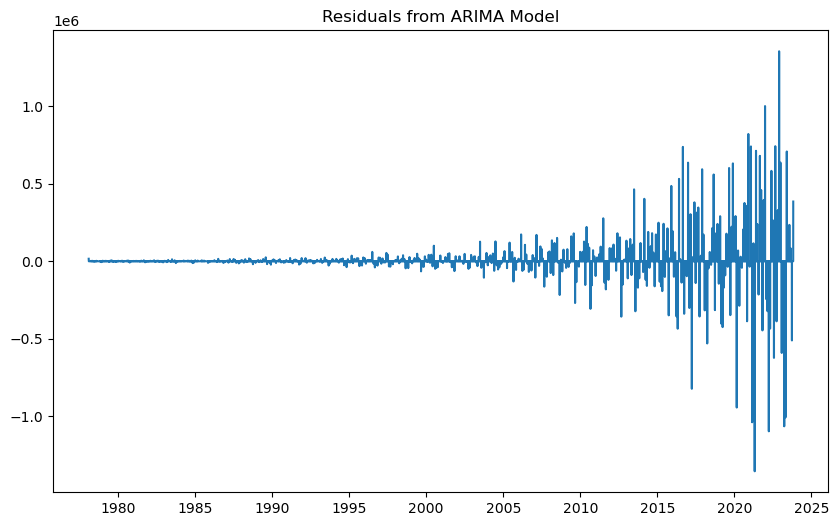

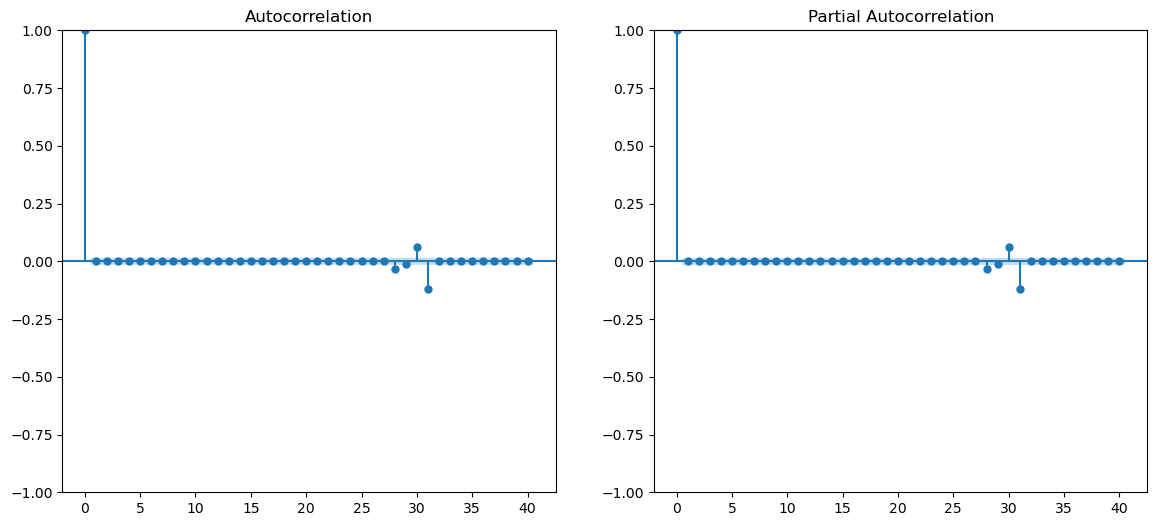

In [36]:

# Parse dates and set the index
#data['Date'] = pd.to_datetime(data['Date'])
#data.set_index('Date', inplace=True)

# Set frequency to daily (assuming data is daily)
data = df.asfreq('D')

# Handle missing values by forward filling
data['Revenue'].fillna(method='ffill', inplace=True)

# Decompose the time series (assuming a yearly cycle of 252 trading days)
decomposition = seasonal_decompose(data['Revenue'], model='multiplicative', period=252)

# Plot the decomposed components
#decomposition.plot()
#plt.show()

# Fit an ARIMA model (order can be fine-tuned based on AIC/BIC or grid search)
model = ARIMA(data['Revenue'], order=(1, 1, 1))
fit_model = model.fit()

# Plot the residuals
residuals = fit_model.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')

# Save the plot
plt.savefig(my_residue_plot, format='jpg')

# Display plot
plt.show()

# Plot ACF and PACF of residuals
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(residuals, lags=40, ax=ax[1])

# Save the plot
plt.savefig(my_corr_plot, format='jpg')

# Display plot


plt.show()
